In [5]:
!pip install -U pandas-profiling


  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl (262 kB)
Processing c:\users\acer\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243\htmlmin-0.1.12-py3-none-any.whl
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
  Using cached phik-0.12.2-cp38-cp38-win_amd64.whl (677 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0
  Attempting uninstall: joblib
    Found existing installation: joblib 0.16.0
    Uninstalling joblib-0.16.0:
      Successfully uninstalled joblib-0.16.0


ERROR: phik 0.12.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.


In [6]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (E:\anaconda3\lib\site-packages\markupsafe\__init__.py)

In [3]:
%matplotlib inline
from sklearn.datasets import load_boston
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

NameError: name 'boston' is not defined

In [7]:
df.describe()

NameError: name 'df' is not defined

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


<IPython.core.display.Javascript object>


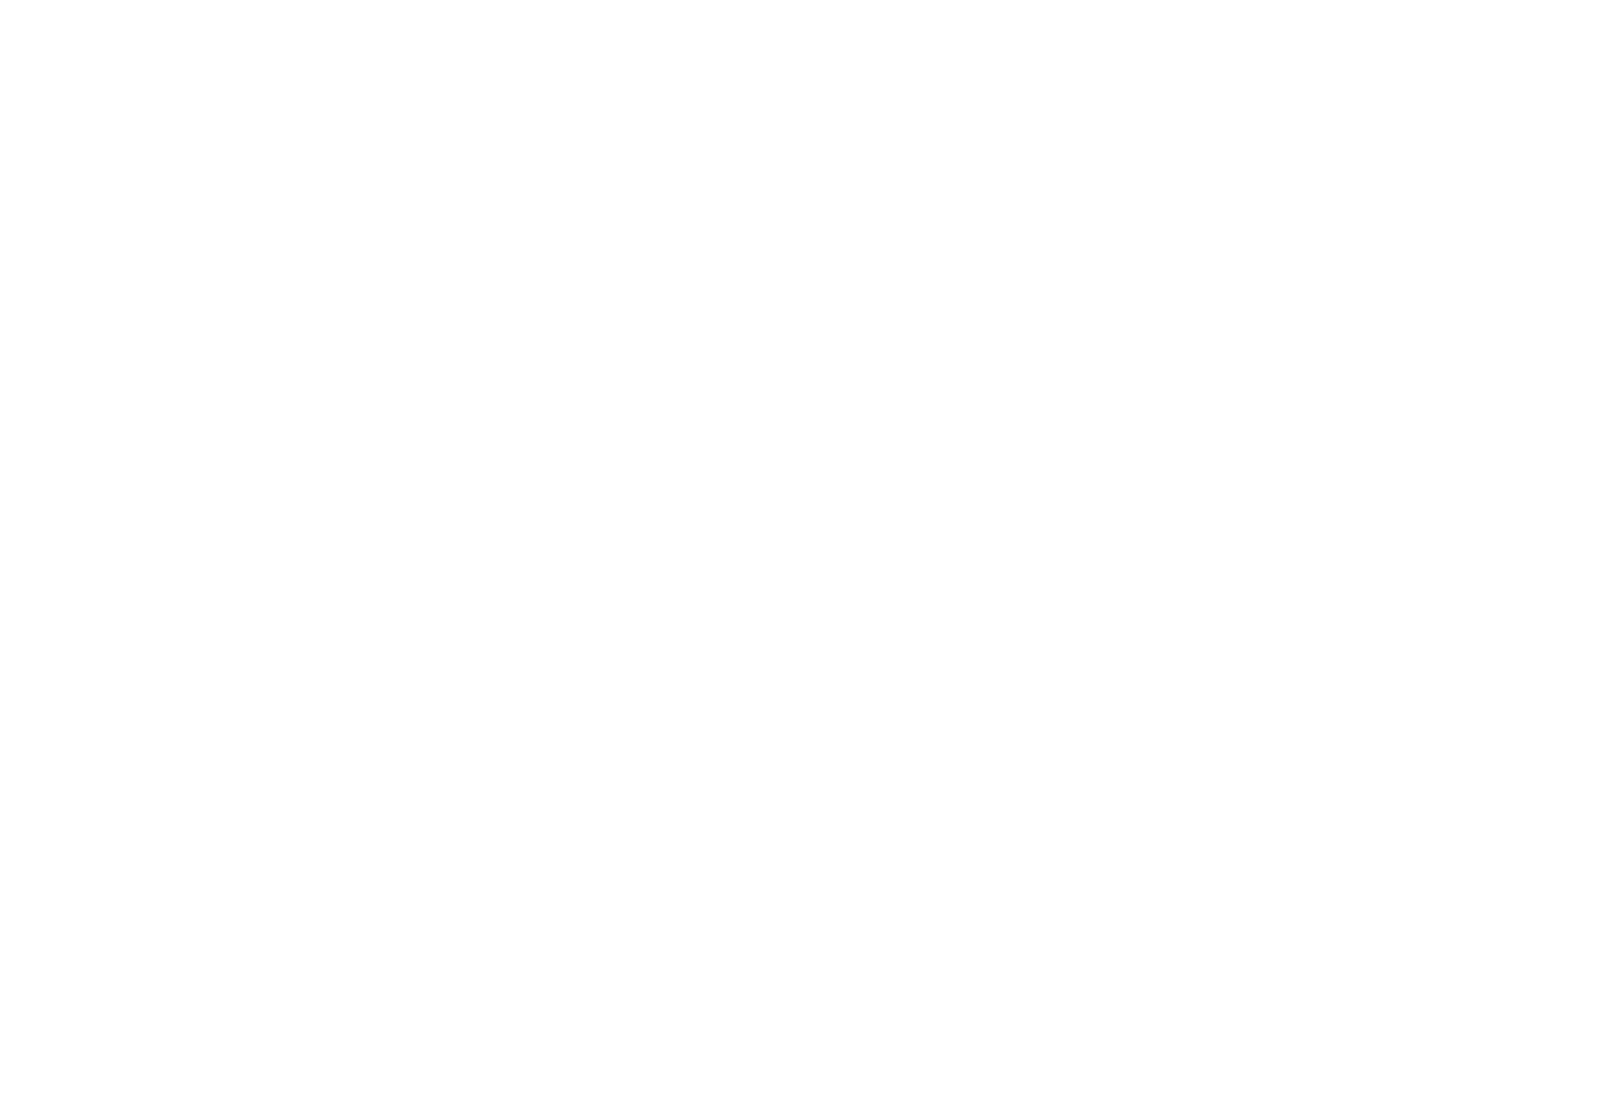

<IPython.core.display.Javascript object>


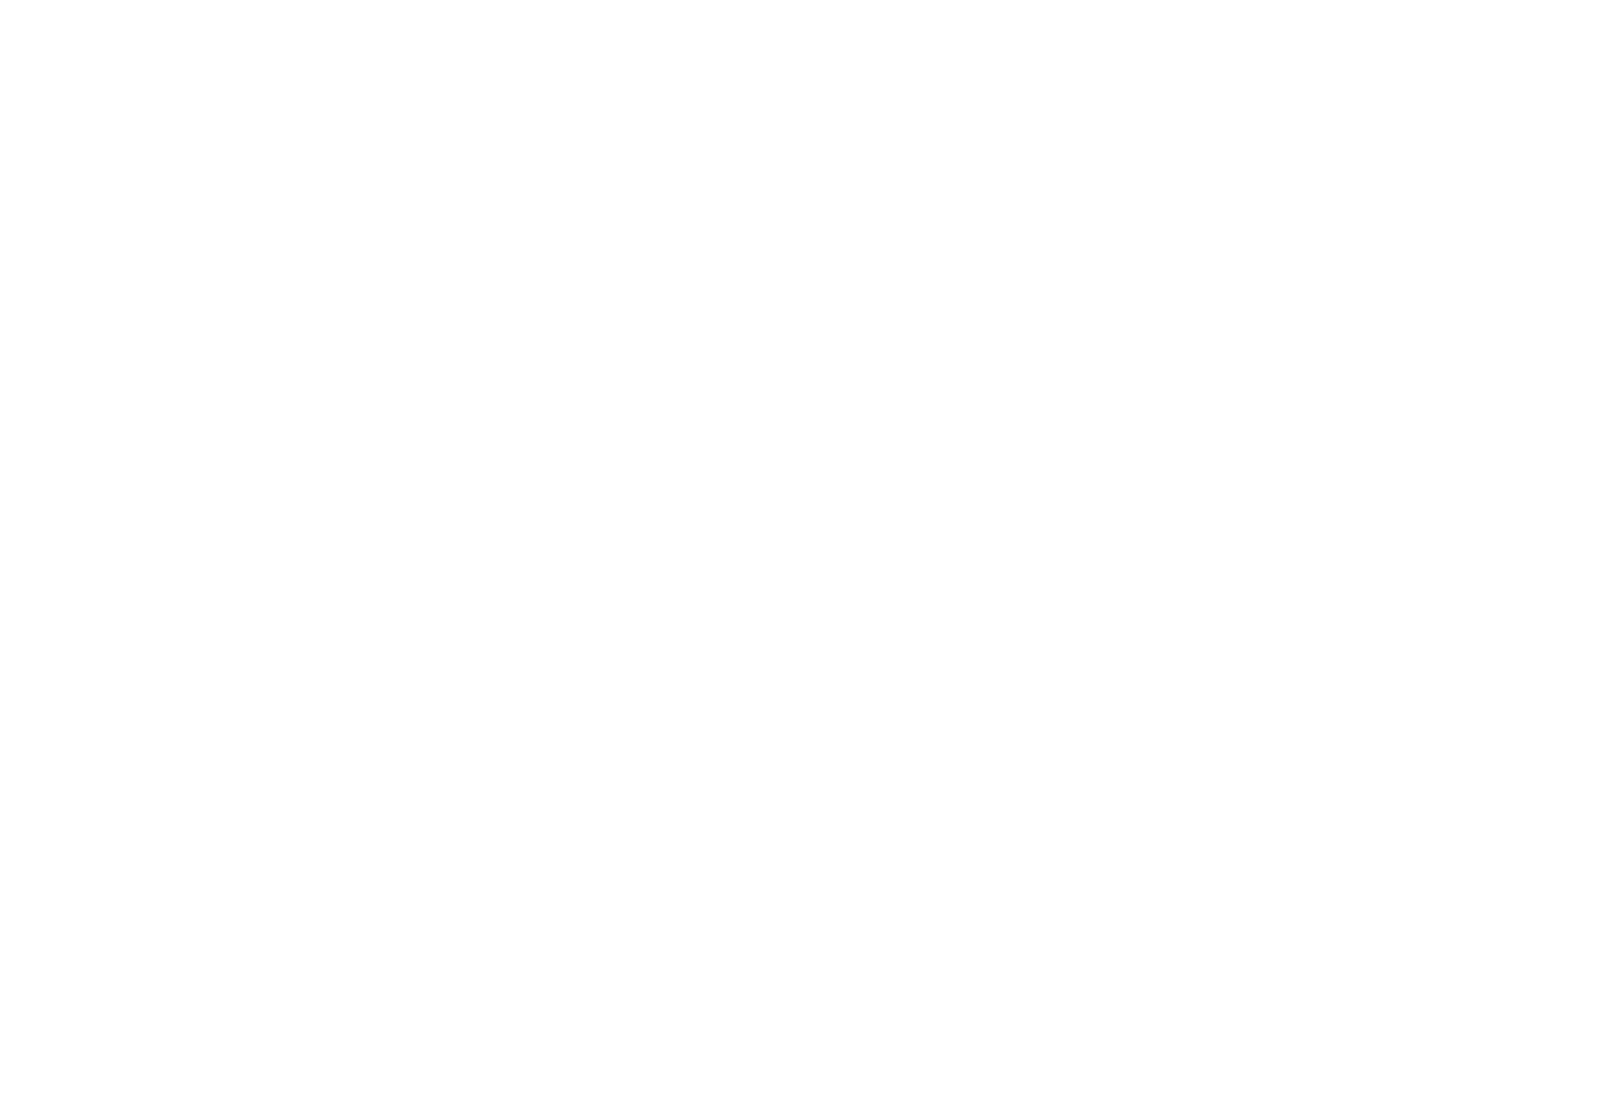

In [ ]:
profile = ProfileReport(df)

In [ ]:
profile.to_file('boston_profile.html')

In [ ]:
df['target'] = boston.target

In [ ]:
df.shape

(506, 14)

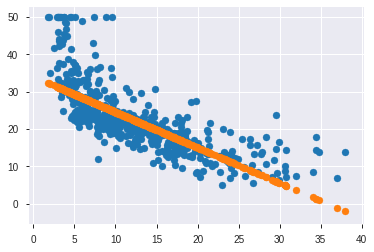

In [ ]:
plt.scatter(df.LSTAT, df.target)
plt.scatter(df.LSTAT, -.95*df.LSTAT + 34)

# lets learn the first model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x = df.LSTAT; y = df.target

In [ ]:
lr = LinearRegression()

In [ ]:
x.values.shape

(506,)

In [ ]:
x = x.values.reshape(-1,1)
y = y.values

In [ ]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_

array([-0.95004935])

In [ ]:
lr.intercept_

34.5538408793831

In [ ]:
lr.score(x, y)

0.5441462975864797

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
mean_absolute_error(y, yhat)

4.505281166250568

In [ ]:
np.sqrt(mean_squared_error(y, yhat))

6.20346413142642

In [ ]:
yhat = lr.predict(x)

# split train, test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.sample(frac=1)

In [ ]:
train, test = train_test_split(df)

In [ ]:
train.shape, test.shape

((379, 14), (127, 14))

In [ ]:
train_cols = ['LSTAT', 'RM']
target_col = 'target'
xtrain = train[train_cols]
xtest = test[train_cols]
ytrain = train[target_col]
ytest = test[target_col]

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
r = Ridge(alpha=1)

In [ ]:
r.fit(xtrain, ytrain)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
yhat_test = r.predict(xtest)

In [ ]:
yhat_test.shape

(127,)

In [ ]:
r2_score(ytest, yhat_test), mean_absolute_error(ytest, yhat_test)

(0.648116099875904, 3.544868686201023)

In [ ]:
r.coef_, r.intercept_

(array([-0.62970915,  5.38173533]), -3.2841207498290466)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [ ]:
scaler = RobustScaler()

In [ ]:
xtrain = scaler.fit_transform(xtrain)

In [ ]:
scaler.center_, scaler.scale_

(array([10.63 ,  6.216]), array([9.8  , 0.717]))

In [ ]:
xtest = scaler.transform(xtest)

In [ ]:
r = Ridge()

In [ ]:
r.fit(xtrain, ytrain)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
r.score(xtest, ytest)

0.6476612092504427

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

In [ ]:
cross_val_score(estimator=LinearRegression(), X=xtrain, y=ytrain, cv=5)

array([0.64305411, 0.59416508, 0.65112484, 0.62629806, 0.60566263])

In [ ]:
cross_validate()

In [ ]:
cross_val_predict()